In [4]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data_fname = 'day5_vents.txt'
with open(data_fname, 'r') as datafile:
    data = [l.strip() for l in datafile.readlines()]

In [6]:
s_input = pd.Series(data)

pattern = r'(?P<x1>\d+),(?P<y1>\d+) -> (?P<x2>\d+),(?P<y2>\d+)'
df = s_input.str.extract(pattern).astype(int)

In [7]:
df['xlo'] = np.minimum(df.x1, df.x2)
df['xhi'] = np.maximum(df.x1, df.x2) +1 # coords are inclusive
df['ylo'] = np.minimum(df.y1, df.y2)
df['yhi'] = np.maximum(df.y1, df.y2) +1

# Part 1

In [8]:
df_ortho = df[(df.x1==df.x2) | (df.y1 == df.y2)]
df_ortho.shape

(332, 8)

In [9]:
df_ortho.describe().loc[['min', 'max']]

,x1,y1,x2,y2,xlo,xhi,ylo,yhi
min,10.0,11.0,10.0,11.0,10.0,11.0,11.0,12.0
max,990.0,989.0,990.0,984.0,990.0,991.0,984.0,990.0


In [10]:
board = np.zeros((1000, 1000))
for i, r in df_ortho.iterrows():
    board[r.xlo:r.xhi, r.ylo:r.yhi] += 1

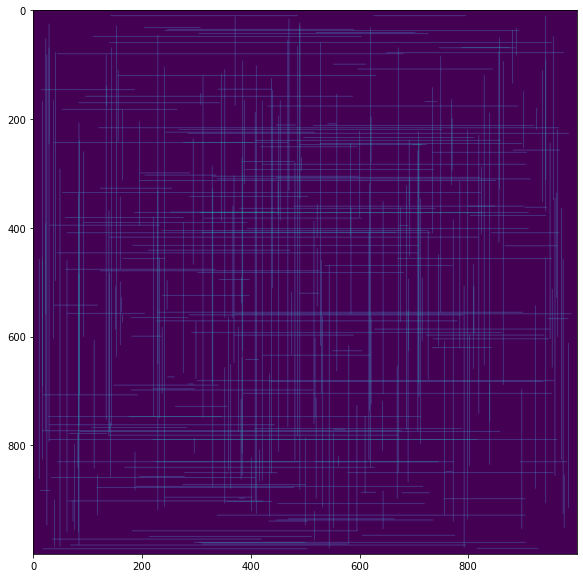

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(board)

In [12]:
len(board[board>1])

6311

# Part 2

In [13]:
df_diag = df[(df.x1!=df.x2) & (df.y1 != df.y2)]
df_diag.shape

(168, 8)

In [14]:
def diag_indices(row):
    if row.x2 > row.x1:
        x_step = 1
        x1 = row.x1
        x2 = row.x2 + 1
    else:
        x_step = -1
        x1 = row.x1
        x2 = row.x2 - 1
        
    if row.y2 > row.y1:
        y_step = 1
        y1 = row.y1
        y2 = row.y2 + 1
    else:
        y_step = -1
        y1 = row.y1
        y2 = row.y2 - 1
        
    idx_x = np.arange(x1, x2, x_step)
    idx_y = np.arange(y1, y2, y_step)
       
    return idx_x, idx_y

In [15]:
board = np.zeros((1000, 1000))
for i, r in df_ortho.iterrows():
    board[r.xlo:r.xhi, r.ylo:r.yhi] += 1

for i, r in df_diag.iterrows():
    y = r.yhi - r.ylo
    x = r.xhi - r.xlo
    if x != y:
        raise RuntimeError(f'Wrong coordinates in row {i}: {r}')

    idx_x, idx_y = diag_indices(r)
    try:
        board[idx_x, idx_y] +=1
    except:
        print(r)
        print(idx_x)
        print(idx_y)
        raise

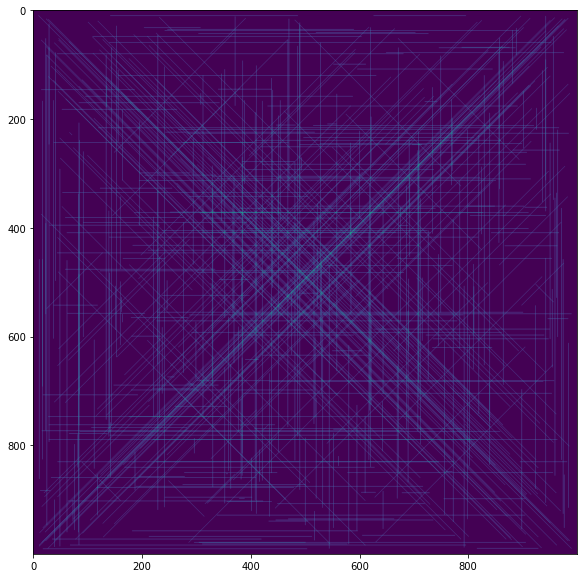

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(board)

In [17]:
len(board[board>1])

19929